In [40]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import seaborn as sns
import pandas as pd
import dlsfunctions as dls

In [41]:
import scipy
import scipy.optimize
import scipy.integrate

In [25]:
r_1 = 2.2439608235145855e-09    # in meters
diameter_1 = r_1 * 2
sigma_1 = 5e-10
c = 1
d = np.linspace(5e-10, 9e-9, 40)

In [26]:
f_1 = dls.generate_distribution(d, diameter_1, sigma_1, c)

In [27]:
dls.check_distribution_norm(f_1, d[1]-d[0])

0.9999999999999999

In [28]:
# Let's put beta into g2's inference parameters
def g2(theta, d, gamma, time):
    #unpack parameters
    f, beta = theta
    size = len(time)
    g2 = np.zeros(size)
    delta_d = d[1] - d[0]
    
    for i in range(size):
        expo = np.exp(-(gamma*time[i])/d)
        sum_squared = (np.sum(f*expo*delta_d))**2
        g2[i] = beta*sum_squared
    return g2

In [29]:
beta = 1
theta_in = (f_1, beta)

In [30]:
gamma_1 = dls.calc_gamma(30, c, 1e-3, 1.33, np.pi/2, 1.38e-23, 298.15, 638e-9)
time_in = np.linspace(1e-4, 1e-1, 200)

In [31]:
simulated_data_1 = g2(theta_in, d, gamma_1, time_in*0.001)

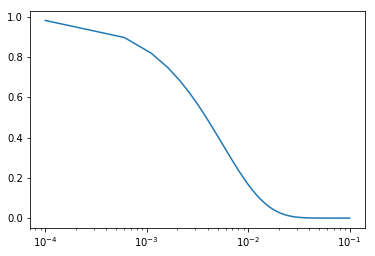

In [32]:
plt.semilogx(time_in, simulated_data_1)

In [52]:
ndim = 40
nwalkers = 200
nsteps = 12000

In [53]:
prelim_pos = f_1
start_pos = [prelim_pos + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [54]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, simulated_data_1, gamma_1, 40, time_in*0.001))

In [ ]:
%time result = sampler.run_mcmc(start_pos, nsteps)

In [46]:
sampler.acceptance_fraction

array([0.33888889, 0.32111111, 0.30666667, 0.33      , 0.32444444,
       0.32888889, 0.31333333, 0.28888889, 0.31111111, 0.33777778,
       0.33555556, 0.33111111, 0.34444444, 0.32444444, 0.33      ,
       0.32888889, 0.30444444, 0.31111111, 0.35666667, 0.30333333,
       0.34      , 0.28333333, 0.31222222, 0.31222222, 0.34666667,
       0.35      , 0.32555556, 0.33555556, 0.30555556, 0.31666667,
       0.31444444, 0.31222222, 0.31777778, 0.32222222, 0.33222222,
       0.35111111, 0.34444444, 0.34      , 0.34777778, 0.31888889,
       0.36      , 0.34777778, 0.35444444, 0.32111111, 0.34555556,
       0.31222222, 0.33      , 0.35777778, 0.35888889, 0.33222222,
       0.34444444, 0.31444444, 0.33333333, 0.32777778, 0.33333333,
       0.34666667, 0.29777778, 0.34111111, 0.32888889, 0.30111111,
       0.33888889, 0.32      , 0.37111111, 0.32555556, 0.31111111,
       0.33666667, 0.33444444, 0.33444444, 0.35222222, 0.37111111,
       0.31111111, 0.34888889, 0.35111111, 0.38333333, 0.37222

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


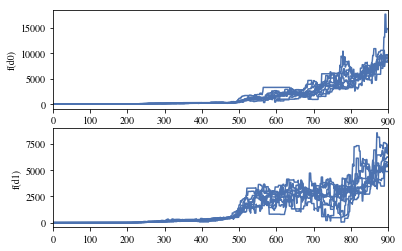

In [47]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)